# pip install wordcloud

In [88]:
pip install wordcloud

# import

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# UIT_VSMEC

## Đọc dữ liệu sau tiền xử lý

In [111]:
preprocessed_uit = pd.read_csv("../data/preprocessed_data/preprocessed_uit.csv", encoding='utf-8-sig', on_bad_lines='skip')

**Do dữ liệu đã được tiền xử lý và lưu dưới dạng chuỗi, ta cần chuyển đổi chúng trở lại thành danh sách từ**

In [115]:
import ast

# Sử dụng hàm literal_eval để chuyển chuỗi thành danh sách
preprocessed_uit['Tokenized_Sentence'] = preprocessed_uit['Tokenized_Sentence'].apply(ast.literal_eval)

In [116]:
texts = preprocessed_uit['Tokenized_Sentence']

# Kiểm tra kiểu phần tử sau khi chuyển đổi
print("Kiểu phần tử:", type(texts.iloc[0]))
print("5 phần tử đầu tiên:", texts.iloc[:5].tolist())

Kiểu phần tử: <class 'list'>
5 phần tử đầu tiên: [['mình', 'xin', 'bài', 'nhạc', 'tên', 'gì', 'ạ'], ['đáng', 'đời', 'con', 'quỷ', 'về', 'nhà', 'lôi', 'con', 'nhà', 'mày', 'đánh', 'phẫn_nộ'], ['lo', 'học', 'yêu', 'đương cười_lớn', 'gì', 'hay', 'thích', 'học sinh', 'học'], ['ước', 'gì', 'sau này', 'về', 'già', 'vẫn', 'có thể', 'cụ', 'cười'], ['mỗi', 'lần', 'video', 'con', 'cứ', 'coi', 'coi', 'hoài', 'cưng', 'con']]


## Các tham số thống kê của bộ dữ liệu

### Tổng quan 

In [117]:
print("===== TỔNG QUAN BỘ DỮ LIỆU =====")
preprocessed_uit.describe()

===== TỔNG QUAN BỘ DỮ LIỆU =====


,Sentence,Emotion,Tokenized_Sentence
count,6183,6183,6183
unique,6183,7,6166
top,dume lũ mất dạy . bố mẹ cho mày ăn học để dơ n...,Enjoyment,[nguy hiểm]
freq,1,1754,5


In [118]:
print("=== SỐ GIÁ TRỊ NULL ===")
print((preprocessed_uit.isna()).sum())

=== SỐ GIÁ TRỊ NULL ===
Sentence              0
Emotion               0
Tokenized_Sentence    0
dtype: int64


Nhận xét: 
- Bộ dữ liệu UIT_VSMEC sau tiền xử lý gồm 6183 mẫu, và 7 nhãn cảm xúc
- Trong đó, nhãn Enjoyment chiếm số lượng nhiều nhất 
- Bộ dữ liệu không có các mẫu trùng lặp và giá trị khuyết

### Phân bố số lượng các nhãn (Emotion)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14364\844262405.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion', data=preprocessed_uit,


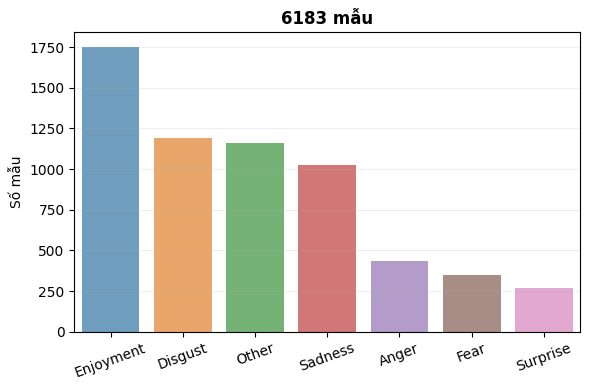

In [119]:
# Lấy danh sách nhãn đã sắp xếp theo số lượng giảm dần (từ tập gốc)
order_by_count = preprocessed_uit['Emotion'].value_counts().index

fig, axes = plt.subplots(figsize=(6, 4))

# --- Biểu đồ 1: trước khi lọc outlier ---
sns.countplot(x='Emotion', data=preprocessed_uit, 
              order=order_by_count, palette='tab10', ax=axes, alpha=0.7)
axes.set_title(f'{len(preprocessed_uit)} mẫu', fontweight='bold')
axes.set_ylabel('Số mẫu')
axes.set_xlabel('')
axes.tick_params(axis='x', rotation=20)
axes.grid(axis='y', alpha=0.2)

plt.tight_layout()
plt.show()

### Phân tích số lượng token trong một câu

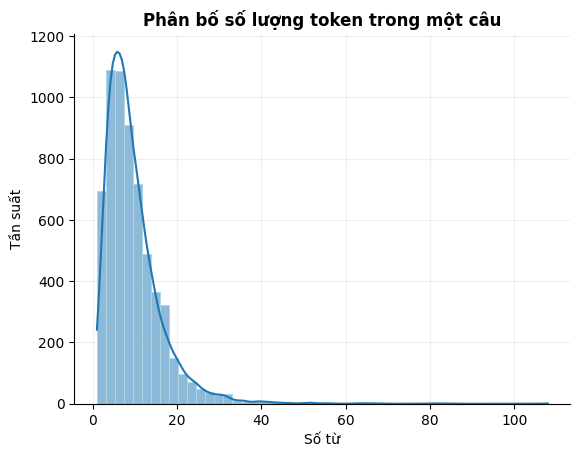

In [120]:
preprocessed_uit['tokens_length'] = preprocessed_uit['Tokenized_Sentence'].apply(lambda x: len(x))

sns.histplot(preprocessed_uit['tokens_length'], bins=50, edgecolor = 'lightblue', kde=True)    # bins: kc cách đều
sns.despine(top=True, right=True)
plt.title("Phân bố số lượng token trong một câu", fontweight = 'bold')
plt.xlabel("Số từ")
plt.ylabel("Tần suất")
plt.grid(alpha = 0.2)
plt.show()

In [121]:
print("THAM SỐ THỐNG KÊ CỘT tokens_length")
preprocessed_uit.describe()

THAM SỐ THỐNG KÊ CỘT tokens_length


,tokens_length
count,6183.000000
mean,9.547307
std,6.783760
min,1.000000
25%,5.000000
50%,8.000000
75%,12.000000
max,108.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_14364\702278627.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Emotion', y='tokens_length', data=preprocessed_uit, palette='Spectral')


<Axes: xlabel='Emotion', ylabel='tokens_length'>

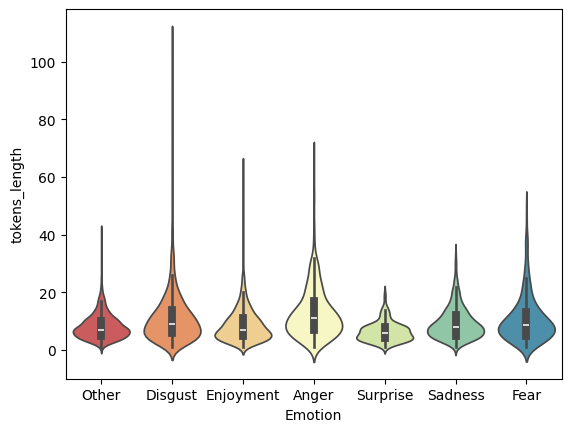

In [123]:
# Boxplot độ dài token theo từng nhãn
# sns.boxplot(x='Emotion', y='tokens_length', data=preprocessed_uit)
# Hoặc violin plot để thấy phân phối chi tiết hơn
sns.violinplot(x='Emotion', y='tokens_length', data=preprocessed_uit, palette='Spectral')

## Loại bỏ Outliner 

In [ ]:
# # Tính Q1, Q3 và IQR
# Q1 = preprocessed_uit['tokens_length'].quantile(0.25)    
# Q3 = preprocessed_uit['tokens_length'].quantile(0.75)

# IQR = Q3 - Q1

# # Tính giới hạn trên, dưới
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
# print(f"Ngưỡng dưới: {lower_bound}, ngưỡng trên: {upper_bound}")

Q1 = 5.0, Q3 = 12.0, IQR = 7.0
Ngưỡng dưới: -5.5, ngưỡng trên: 22.5


ngưỡng trên là 22.5, nhưng mà model vẫn có thể nhận biết tốt với số từ lớn hơn nx :<

In [ ]:
# # Loại bỏ các mẫu có số token > upper_bound
# preprocessed_uit_filter = preprocessed_uit[preprocessed_uit['tokens_length'] <= upper_bound]
# print("Số lượng dòng loại bỏ sau khi loại bỏ outliner:", preprocessed_uit[preprocessed_uit['tokens_length'] > upper_bound].shape[0])
# print("Phân trăm dòng loại bỏ:", (preprocessed_uit[preprocessed_uit['tokens_length'] > upper_bound].shape[0] / preprocessed_uit.shape[0]) * 100, "%")
# print("Kích thước bộ dữ liệu sau khi loại bỏ outliner:", preprocessed_uit_filter.shape)

Số lượng dòng loại bỏ sau khi loại bỏ outliner: 270
Phân trăm dòng loại bỏ: 4.366812227074235 %
Kích thước bộ dữ liệu sau khi loại bỏ outliner: (5913, 4)


C:\Users\Admin\AppData\Local\Temp\ipykernel_14364\264325366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_uit_filter['tokens_length'] = preprocessed_uit_filter['Tokenized_Sentence'].apply(lambda x: len(x))


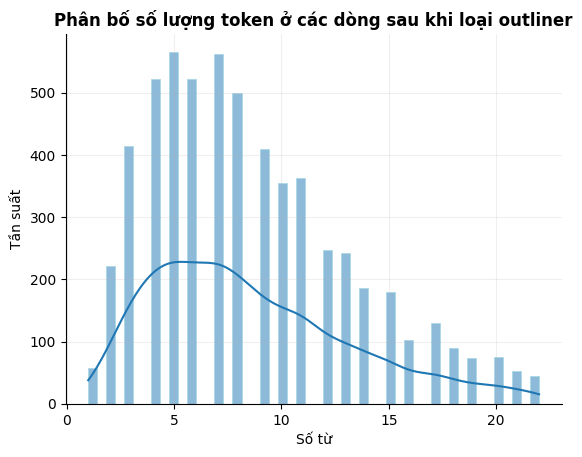

In [ ]:
# # Vẽ lại phân bố sau loại bỏ 
# preprocessed_uit_filter['tokens_length'] = preprocessed_uit_filter['Tokenized_Sentence'].apply(lambda x: len(x))

# sns.histplot(preprocessed_uit_filter['tokens_length'], bins=50, edgecolor = 'lightblue', kde=True)    # bins: kc cách đều
# sns.despine(top=True, right=True)
# plt.title("Phân bố số lượng token ở các dòng sau khi loại outliner", fontweight = 'bold')
# plt.xlabel("Số từ")
# plt.ylabel("Tần suất")
# plt.grid(alpha = 0.2)
# plt.show()

Nhận xét: 
- Bộ dữ liệu sau khi loại bỏ outlier, có phân bố số lượng token chủ yếu nằm nhiều xung quanh độ dài là 25 - 75

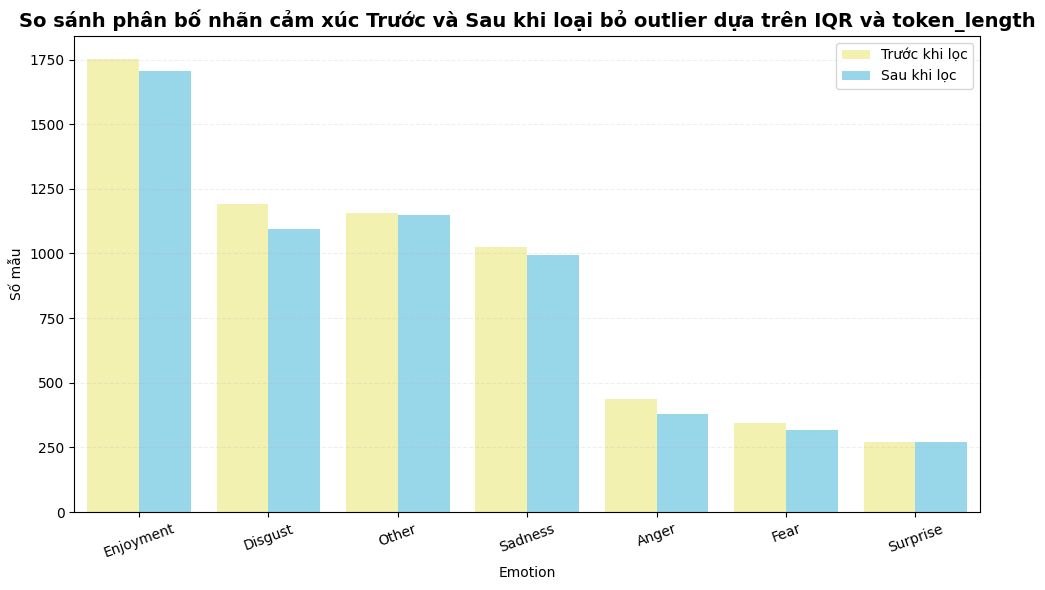

In [ ]:
# # 1. Chuẩn bị dữ liệu: Gán nhãn để phân biệt và gộp lại
# # Tạo bản sao nhẹ để không ảnh hưởng dữ liệu gốc
# df_before = preprocessed_uit[['Emotion']].copy()
# df_before['Trạng thái'] = 'Trước khi lọc'

# df_after = preprocessed_uit_filter[['Emotion']].copy()
# df_after['Trạng thái'] = 'Sau khi lọc'

# # Gộp 2 dataframe lại thành 1 (Long format)
# df_combined = pd.concat([df_before, df_after])

# # 2. Lấy thứ tự sắp xếp (theo số lượng từ tập gốc giảm dần)
# order_by_count = preprocessed_uit['Emotion'].value_counts().index

# # 3. Vẽ biểu đồ
# plt.figure(figsize=(10, 6))

# # Dùng 'hue' để tách cột theo trạng thái
# sns.countplot(x='Emotion', 
#               data=df_combined, 
#               hue='Trạng thái', 
#               order=order_by_count, 
#               palette={'Trước khi lọc': "#fefca5",'Sau khi lọc': "#8addf8"},
#               alpha=1)

# plt.title('So sánh phân bố nhãn cảm xúc Trước và Sau khi loại bỏ outlier dựa trên IQR và token_length', fontweight='bold', fontsize=14)
# plt.ylabel('Số mẫu')
# plt.xlabel('Emotion')
# plt.xticks(rotation=20)
# plt.grid(axis='y', alpha=0.2, linestyle='--')
# plt.legend(title=None) # Tắt tiêu đề của chú thích cho gọn

# plt.tight_layout()
# plt.show()

Nhận xét: tỉ lệ các nhãn không thay đổi quá nhiều sau khi loại bỏ outliner

## Trực quan hóa

In [ ]:
preprocessed_uit.head(5)

,Sentence,Emotion,Tokenized_Sentence,tokens_length
0,cho mình xin bài nhạc tên là gì với ạ,Other,"[mình, xin, bài, nhạc, tên, gì, ạ]",7
1,cho đáng đời con quỷ . về nhà lôi con nhà mày ...,Disgust,"[đáng, đời, con, quỷ, về, nhà, lôi, con, nhà, ...",12
2,lo học đi . yêu đương cười_lớn gì hay lại thíc...,Disgust,"[lo, học, yêu, đương cười_lớn, gì, hay, thích,...",9
3,ước gì sau này về già vẫn có thể như cụ này cười,Enjoyment,"[ước, gì, sau này, về, già, vẫn, có thể, cụ, c...",9
4,mỗi lần có video của con là cứ coi đi coi lại ...,Enjoyment,"[mỗi, lần, video, con, cứ, coi, coi, hoài, cưn...",10


### Tần suất từ tổng thể

Ảnh này show ra sau bước tiền xử lý loại từ dừng

In [ ]:
preprocessed_uit['Tokenized_Sentence']

0                      [mình, xin, bài, nhạc, tên, gì, ạ]
1       [đáng, đời, con, quỷ, về, nhà, lôi, con, nhà, ...
2       [lo, học, yêu, đương cười_lớn, gì, hay, thích,...
3       [ước, gì, sau này, về, già, vẫn, có thể, cụ, c...
4       [mỗi, lần, video, con, cứ, coi, coi, hoài, cưn...
                              ...                        
6177           [ưới, gì, honey, mình, sau này, cũng, thế]
6178                                   [nhọc, lòng, buồn]
6179    [tao, muốn, làm bạn, tốt, anh em, tri kỉ, tụi,...
6180                     [cơm, tấm, ngoài, cũng, phẫn_nộ]
6181                                    [chất liệu, đỉnh]
Name: Tokenized_Sentence, Length: 5913, dtype: object

C:\Users\Admin\AppData\Local\Temp\ipykernel_14364\2059916710.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_uit_filter['Tokenized_Sentence'] = preprocessed_uit_filter['Tokenized_Sentence'].apply(convert_to_list)


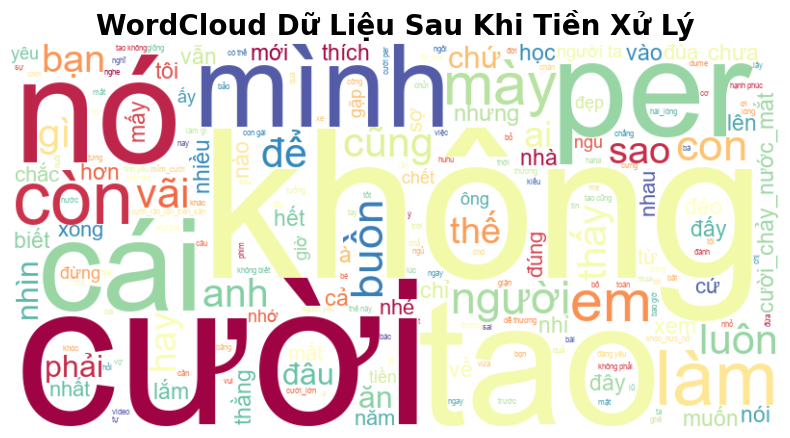

In [130]:
from collections import Counter
from wordcloud import WordCloud
import ast  # Thêm thư viện này để parse string thành list

# Chuyển về dạng string 
def convert_to_list(text):
    if isinstance(text, str):
        try:
            return ast.literal_eval(text)
        except:
            return text.split()
    return text

preprocessed_uit_filter['Tokenized_Sentence'] = preprocessed_uit_filter['Tokenized_Sentence'].apply(convert_to_list)

# Join lại
all_words = " ".join([" ".join(tokens) if isinstance(tokens, list) else tokens 
                     for tokens in preprocessed_uit_filter['Tokenized_Sentence']])

# Tạo WordCloud
wc = WordCloud(font_path='arial',
               background_color='white',
               width=800, height=400,
               colormap='Spectral').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Dữ Liệu Sau Khi Tiền Xử Lý",
          fontsize=20,
          fontweight='bold')
plt.show()

Nhận xét: Do enjoyment và icon nhiều nên chữ cười có tần suất xuất hiện nhiều nhất 

### Tần suất từ theo từng nhãn

C:\Users\Admin\AppData\Local\Temp\ipykernel_14364\1595705908.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_uit_filter['Tokenized_Sentence'] = preprocessed_uit_filter['Tokenized_Sentence'].apply(convert_to_list)


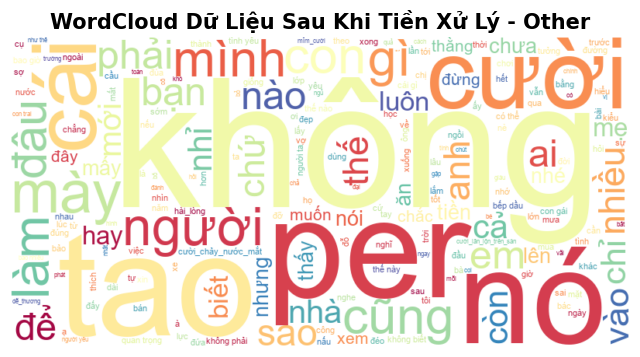

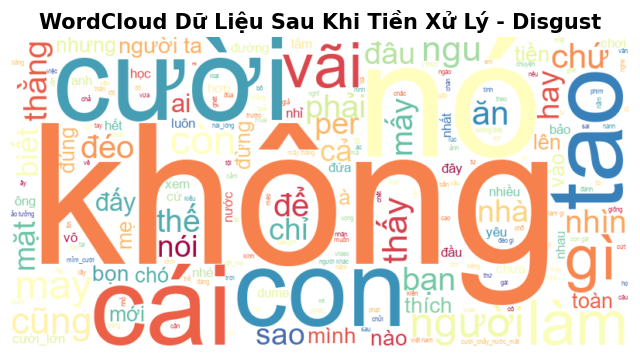

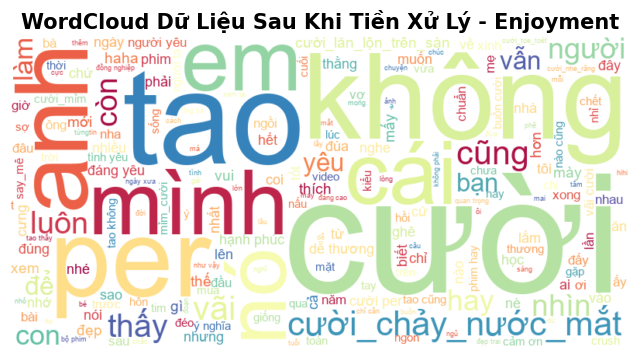

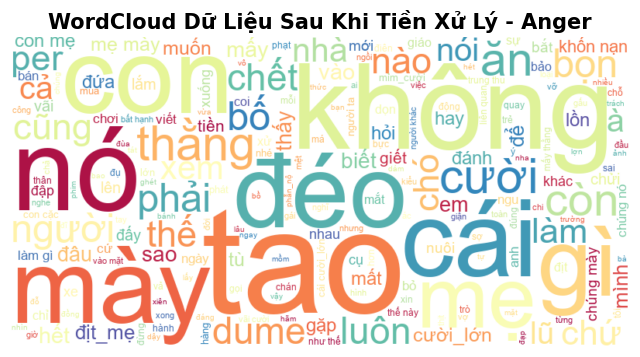

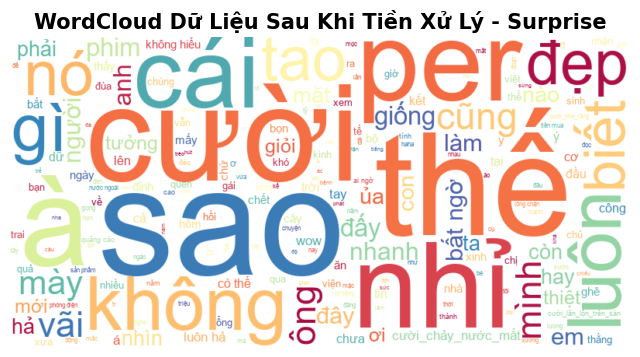

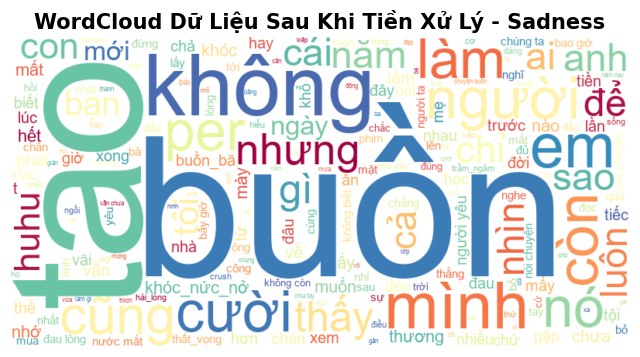

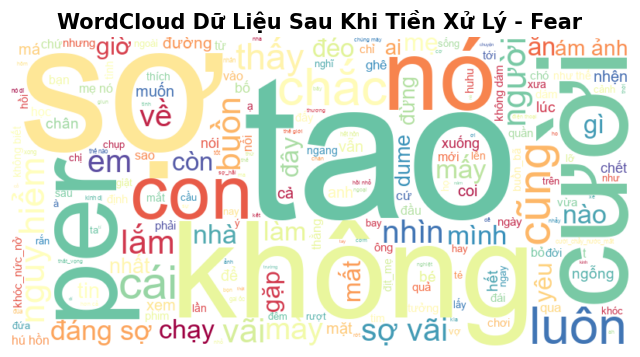

In [131]:
# WordCloud cho từng nhãn cảm xúc
emotions = preprocessed_uit_filter['Emotion'].unique()

for idx, emotion in enumerate(emotions):
    emotion_data = preprocessed_uit_filter[preprocessed_uit_filter['Emotion'] == emotion]
    preprocessed_uit_filter['Tokenized_Sentence'] = preprocessed_uit_filter['Tokenized_Sentence'].apply(convert_to_list)

    # Join lại
    all_words = " ".join([" ".join(tokens) if isinstance(tokens, list) else tokens 
                        for tokens in emotion_data['Tokenized_Sentence']])

    # Tạo WordCloud
    wc = WordCloud(font_path='arial',
                background_color='white',
                width=800, height=400,
                colormap='Spectral').generate(all_words)

    plt.figure(figsize=(8, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud Dữ Liệu Sau Khi Tiền Xử Lý - {emotion}",
            fontsize=15,
            fontweight='bold')
    plt.show()

### Phân bố số lượng token theo từng nhãn

--- THỐNG KÊ ĐỘ DÀI TOKEN THEO NHÃN ---
            count       mean       std  min  25%   50%   75%   max
Emotion                                                           
Anger       380.0  14.694737  8.104950  1.0  8.0  13.0  19.0  39.0
Disgust    1096.0  13.672445  7.748525  1.0  7.0  13.0  19.0  37.0
Enjoyment  1707.0  11.814880  6.979937  1.0  6.0  10.0  16.0  48.0
Fear        317.0  12.574132  7.186377  2.0  7.0  11.0  17.0  34.0
Other      1149.0  11.956484  6.018397  2.0  7.0  11.0  15.0  35.0
Sadness     994.0  13.222334  7.024190  1.0  8.0  12.0  17.0  38.0
Surprise    270.0   9.218519  4.595176  2.0  6.0   8.0  11.0  30.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_14364\2116572697.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y='token_length', data=df, order=order_by_count, palette='tab10')


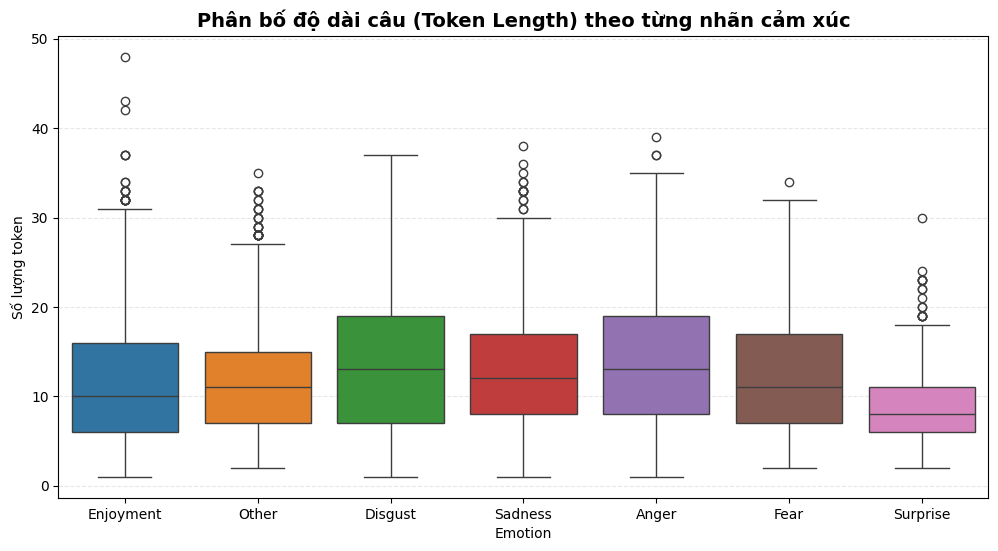

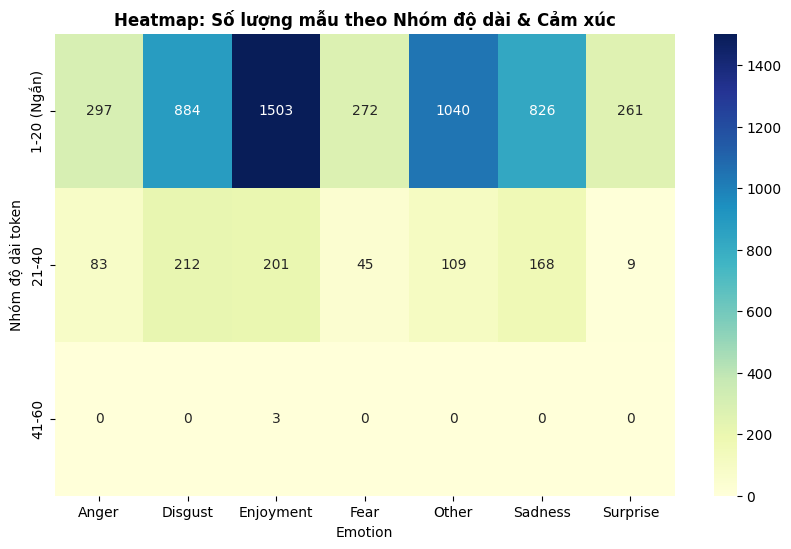

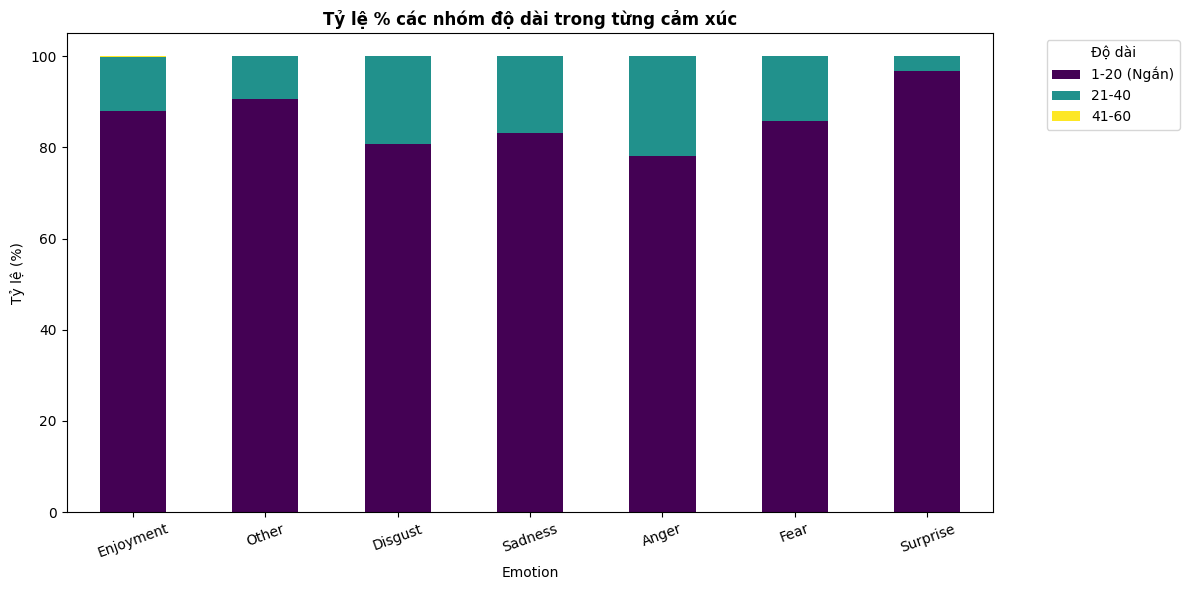

In [132]:
# Giả định dataframe đã lọc của bạn tên là: preprocessed_uit_filter
df = preprocessed_uit_filter.copy()

# Đảm bảo cột token_length tồn tại (nếu chưa có thì tính lại)
if 'token_length' not in df.columns:
    df['token_length'] = df['Sentence'].apply(lambda x: len(str(x).split()))

# Lấy thứ tự nhãn theo số lượng (để vẽ cho đẹp)
order_by_count = df['Emotion'].value_counts().index

# ==========================================
# PHẦN 1: BẢNG THỐNG KÊ CHI TIẾT (Describe)
# ==========================================
print("--- THỐNG KÊ ĐỘ DÀI TOKEN THEO NHÃN ---")
stats = df.groupby('Emotion')['token_length'].describe()
print(stats)

# ==========================================
# PHẦN 2: BIỂU ĐỒ BOXPLOT (So sánh phân bố)
# ==========================================
plt.figure(figsize=(12, 6))
sns.boxplot(x='Emotion', y='token_length', data=df, order=order_by_count, palette='tab10')

plt.title('Phân bố độ dài câu (Token Length) theo từng nhãn cảm xúc', fontweight='bold', fontsize=14)
plt.ylabel('Số lượng token')
plt.xlabel('Emotion')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.show()

# ==========================================
# PHẦN 3: PHÂN NHÓM ĐỘ DÀI (Theo ảnh bạn gửi)
# ==========================================
# Định nghĩa các khoảng (bins) và nhãn (labels)
bins = [0, 20, 40, 60, 80, 120, 1000]
labels = ['1-20 (Ngắn)', '21-40', '41-60', '61-80', '81-120', '>120 (Rất dài)']

# Tạo cột nhóm độ dài
df['len_group'] = pd.cut(df['token_length'], bins=bins, labels=labels)

# Tính toán bảng Pivot: Đếm số lượng emotion trong từng nhóm độ dài
pivot_table = pd.crosstab(df['len_group'], df['Emotion'])

# Vẽ biểu đồ Heatmap để nhìn độ tập trung
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Số lượng mẫu theo Nhóm độ dài & Cảm xúc', fontweight='bold')
plt.xlabel('Emotion')
plt.ylabel('Nhóm độ dài token')
plt.show()

# (Tùy chọn) Vẽ biểu đồ Stacked Bar để xem tỷ lệ %
pivot_percent = pd.crosstab(df['Emotion'], df['len_group'], normalize='index') * 100
pivot_percent = pivot_percent.loc[order_by_count] # Sắp xếp lại thứ tự

pivot_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Tỷ lệ % các nhóm độ dài trong từng cảm xúc', fontweight='bold')
plt.ylabel('Tỷ lệ (%)')
plt.xlabel('Emotion')
plt.legend(title='Độ dài', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()